In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.skbn import BNClassifier
from pyAgrum.lib.bn2roc import showROC_PR

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

from matplotlib.colors import ListedColormap

# Classification with pyAgrum

pyAgrum allows to easily create BN classifiers using multiples algorithms.

You can either use learners and perform inferences within the learn models or use scikit-learn compliant classifiers.

## Naive Bayes

### Reading database with pandas ...

In [33]:
traindf=pd.read_csv("res/titanic/post_train.csv")

... and using it to define a structure that will be used to learn parameters ...

In [3]:
naive = gum.BayesNet('Titanic')

y = gum.LabelizedVariable("Survived","", len(traindf["Survived"].unique()))
naive.add(y)

for k in traindf.keys():
    if not k == "Survived":
        lv = gum.LabelizedVariable(k,"", len(traindf[k].unique()))
        naive.add(lv)
        naive.addArc("Survived",k)

learner=gum.BNLearner("res/titanic/post_train.csv")
learner.useAprioriSmoothing(1)
nb_pd =learner.learnParameters(naive.dag())

### ... or in few lines using Scikit-Learn compliant classifier !

In [39]:
nb_sk = BNClassifier(learningMethod="NaiveBayes", aPriori='Laplace', aPrioriWeight=1,discretizationStrategy="uniform",usePR=False)
nb_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

nb_sk.bn

(gum::BayesNet<double>@0x7f829f93da00) BN{nodes: 7, arcs: 6, domainSize: 864, dim: 38}

## TAN (Tree-augmented Naive Bayes)

In [40]:
tan_sk = BNClassifier(learningMethod="TAN", aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
tan_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

## Chow-Liu tree

In [41]:
cl_sk = BNClassifier(learningMethod="Chow-Liu", aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
cl_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

## BayesNet ...
### ... using MIIC

In [52]:
bn_sk = BNClassifier(learningMethod="MIIC", aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
bn_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

### ... using TABU

In [43]:
bn_tabu_sk = BNClassifier(learningMethod="Tabu", aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
bn_tabu_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

### ... using GHC

In [44]:
bn_GHC_sk = BNClassifier(learningMethod="GHC", aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
bn_GHC_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

### ... using 3off2

In [55]:
bn_3off2_sk = BNClassifier(learningMethod="3off2", aPriori='Laplace', aPrioriWeight=1, discretizationNbBins=5,discretizationStrategy="uniform",usePR=False)
bn_3off2_sk.fit(filename="res/titanic/post_train.csv",targetName="Survived")

Using pyAgrum, you can easily :

- Change the learning method
- Define structural constraints (mandatory or forbidden arcs)
- Change the method for the a priori smoothing (Laplace, BDeu , Dirichlet and None)
- Change the score used when necessary (AIC, BIC, BD, BDeu, K2, Log2)
- Change the method of discretization
- ...

## Comparing structures

In [101]:
classifiers = [nb_sk,tan_sk,cl_sk,bn_GHC_sk,bn_tabu_sk,bn_sk,bn_3off2_sk]
classifiers_names = ['NaiveBayes','TAN','Chow-liu','GHC','TABU','MIIC','3off2']

gnb.sideBySide(*[classifier.bn for classifier in classifiers[:3]],
    captions=classifiers_names[:3])

gnb.sideBySide(*[classifier.bn for classifier in classifiers[3:]],
    captions=classifiers_names[3:])

NaiveBayes,TAN,Chow-liu


GHC,TABU,MIIC,3off2


# ROC et PR

------------------------------------------------ NaiveBayes ------------------------------------------------



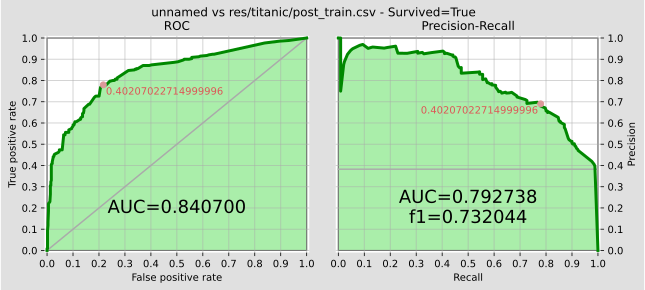




------------------------------------------------ TAN ------------------------------------------------



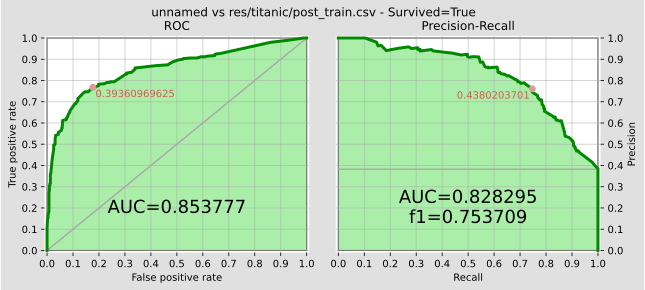




------------------------------------------------ Chow-liu ------------------------------------------------



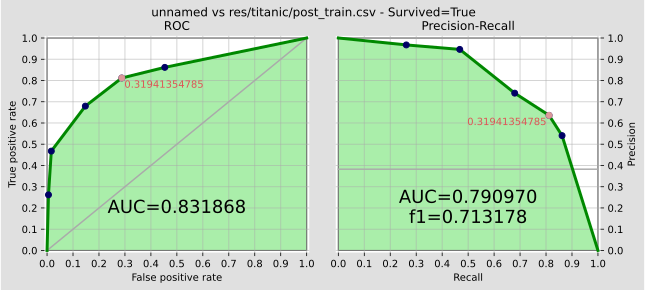




------------------------------------------------ GHC ------------------------------------------------



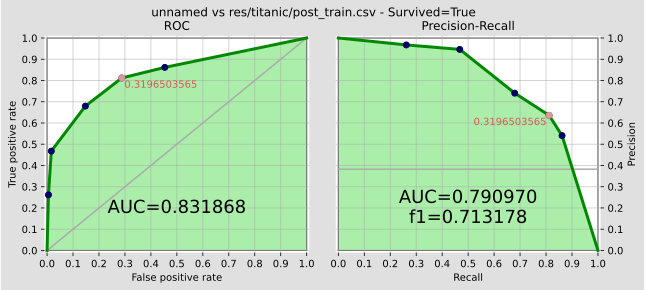




------------------------------------------------ TABU ------------------------------------------------



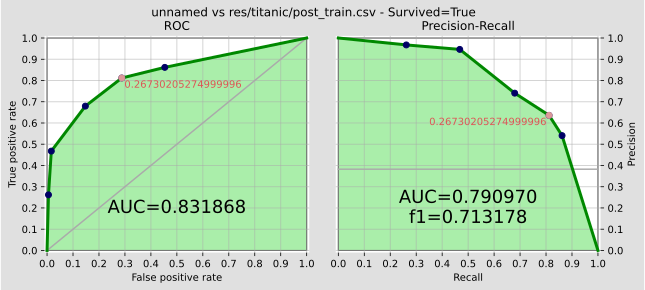




------------------------------------------------ MIIC ------------------------------------------------



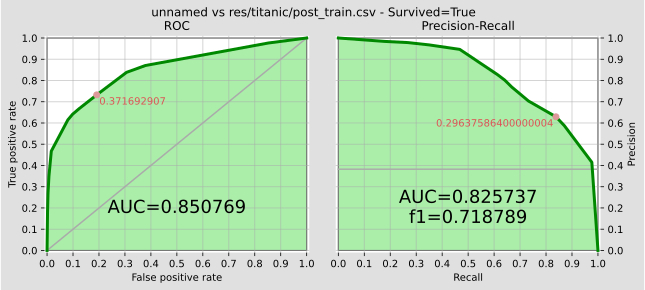




------------------------------------------------ 3off2 ------------------------------------------------



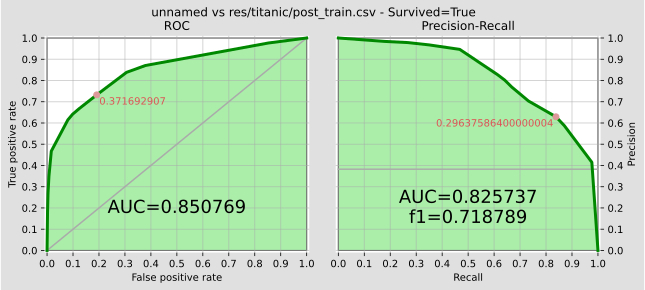

In [104]:
import pyAgrum.lib.explain as explain

res = []

for i, classifier in enumerate(classifiers):
    print(f'------------------------------------------------ {classifiers_names[i]} ------------------------------------------------\n')
    roc_auc,_,pr_auc,_ = showROC_PR(classifier.bn, "res/titanic/post_train.csv", 'Survived',label=True,show_progress=False,showROC=True,showPR=True)    
    res.append([roc_auc,pr_auc])
    explain.showInformation(classifier.bn,{},size="5")
    #explain.plotIndependenceListForPairs(classifier.bn,f"res/titanic/post_train.csv")
    print('\n\n')

In [105]:
pd.DataFrame(res, classifiers_names, ['ROC AUC','PR AUC'])

,ROC AUC,PR AUC
NaiveBayes,0.840700,0.792738
TAN,0.853777,0.828295
Chow-liu,0.831868,0.790970
GHC,0.831868,0.790970
TABU,0.831868,0.790970
MIIC,0.850769,0.825737
3off2,0.850769,0.825737
